In [1]:
using HDF5, StatsBase, Statistics,PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

┌ Info: Precompiling HDF5 [f67ccb44-e63f-5c2f-98bd-6dc0ccc4ba2f]
└ @ Base loading.jl:1260


In [2]:
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
arx=h5open(arxname)
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos"
 "CanalesMalos"
 "LFPSaturados"
 "desde"
 "freq"
 "hasta"

In [3]:
canales=read(arx["CanalesBuenos"])
malos=read(arx["CanalesMalos"])
#lfp=read(arx["dset"]);
csda=read(arx["CSDALindenberg"]);
lfp=read(arx["LFPSaturados"]);
#freq=read(arx["SamplingRate"])/1000
freq=read(arx["freq"])
nmax=size(lfp,3)

2000

In [4]:
dlfp=zeros(64,64,nmax-1)

for j=1:64,k=1:64
    dlfp[j,k,:]=diff(lfp[j,k,:])
end

In [5]:
#symblfp=zeros(64,64,nmax-1);
#=for j=1:64,k=1:64, n=1:(nmax-1)
    symblfp[j,k,n]=sign(dlfp)
end
=#
symblfp=map(sign, dlfp)
slfpA=vec(symblfp[50,28,:])
slfpB=vec(symblfp[60,35,:]);

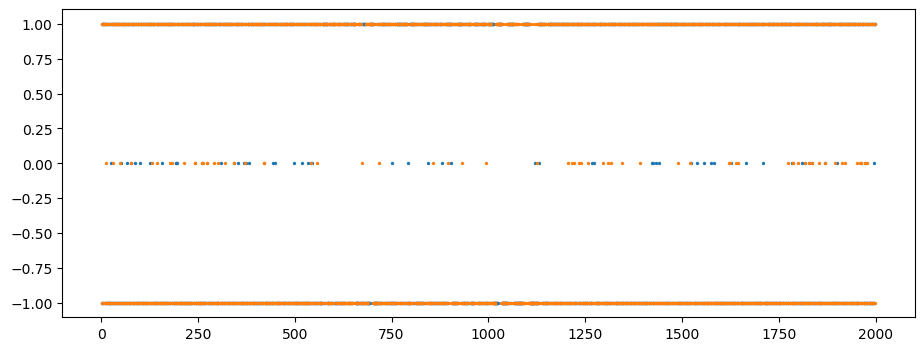

PyObject <matplotlib.collections.PathCollection object at 0x7f6af96cb950>

In [6]:
figure(figsize=(11,4))
scatter(1:(nmax-1),slfpA, s=2)
scatter(1:(nmax-1),slfpB, s=2)

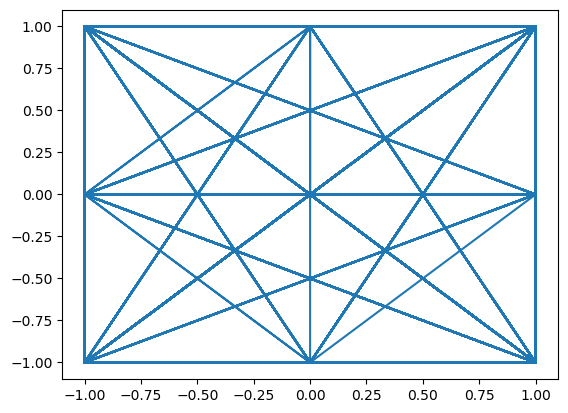

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6af9602b10>

In [7]:
plot(slfpA, slfpB)

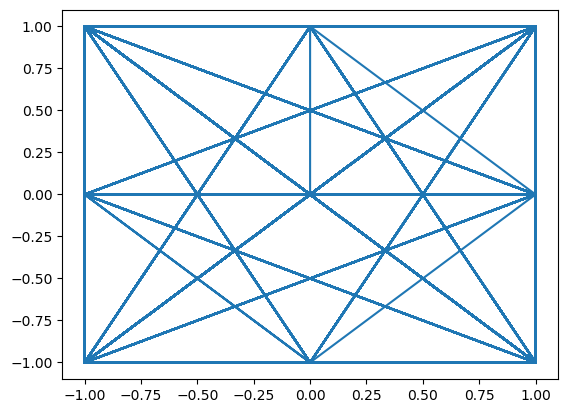

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6af8cbe3d0>

In [8]:
slfpA=vec(symblfp[48,30,:])
slfpB=vec(symblfp[63,31,:]);
plot(slfpA, slfpB)

In [9]:
nchans=size(canales,1)

sbuenos=[0]

for j=1:nchans
    q=canales[j,1]
    p=canales[j,2]
    sss=symblfp[q,p,:]
    sbuenos=vcat(sbuenos, sss)
end
sbuenos=sbuenos[2:end];

In [10]:
function dictarrayordenado(dd::Dict)
    llaves=sort(collect(keys(dd)))
    nnll=length(llaves)
    result=zeros(nnll,2)
    for k in 1:nnll
        result[k,1]=llaves[k]
        result[k,2]=dd[llaves[k]]
    end
    #result=result[sortperm(result[:, 1]), :]
    return result
end

dictarrayordenado (generic function with 1 method)

In [11]:
probss=dictarrayordenado(countmap(sbuenos))

3×2 Array{Float64,2}:
 -1.0      1.02128e6
  0.0  69881.0
  1.0      1.01979e6

In [12]:
entropy(probss[:,2]./sum(probss[:,2]))

0.8155730667524039

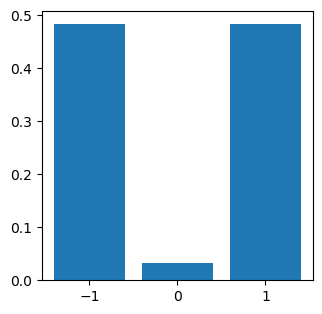

In [13]:
figure(figsize=(3.5,3.5))
xticks([-1,0,1])
bar(probss[:,1],probss[:,2]./sum(probss[:,2]))
savefig("histo2s01.png",dpi=90)

In [14]:
s2=zeros(64,64,nmax-7)
for j=1:64, k=1:64, n=1:(nmax-8)
    s2[j,k,n]=sum(symblfp[j,k,n:n+7])
end

In [15]:
s3=zeros(64,64,nmax-14)
for j=1:64, k=1:64, n=1:(nmax-15)
    s3[j,k,n]=sum(symblfp[j,k,n:n+14])
end

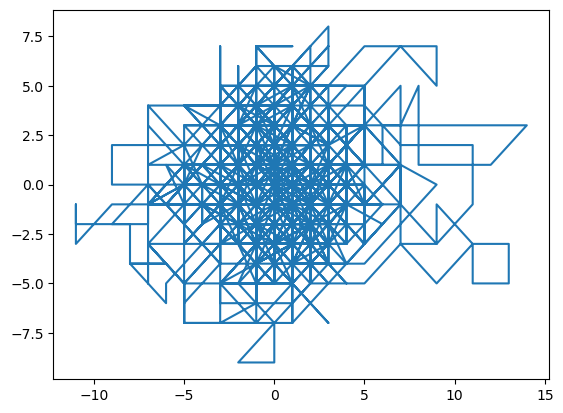

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6af950efd0>

In [16]:
chanA=[48,30]
chanB=[63,31]
slfpA=vec(s3[48,30,:])
slfpB=vec(s3[63,31,:]);
plot(slfpA, slfpB)

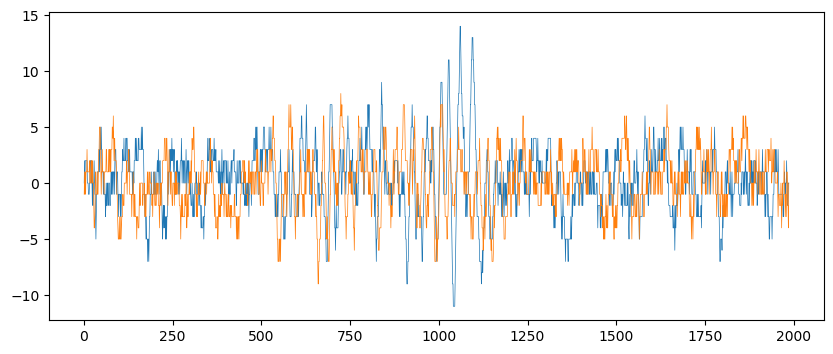

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc6830fd490>

In [41]:
n2=length(slfpA)
figure(figsize=(10,4))
plot(1:n2, slfpA, lw=0.5)
plot(1:n2,slfpB, lw=0.5)

In [42]:
dA=dictarrayordenado(countmap(slfpA))
dB=dictarrayordenado(countmap(slfpB))
dA[:,2]=dA[:,2]./sum(dA[:,2])
dB[:,2]=dB[:,2]./sum(dB[:,2])

17-element Array{Float64,1}:
 0.0010070493454179255
 0.010070493454179255
 0.004028197381671702
 0.03121852970795569
 0.02416918429003021
 0.09969788519637462
 0.06445115810674723
 0.18680765357502518
 0.10725075528700906
 0.20342396777442096
 0.07754279959718026
 0.1027190332326284
 0.038267875125881166
 0.03172205438066465
 0.010070493454179255
 0.007049345417925478
 0.0005035246727089627

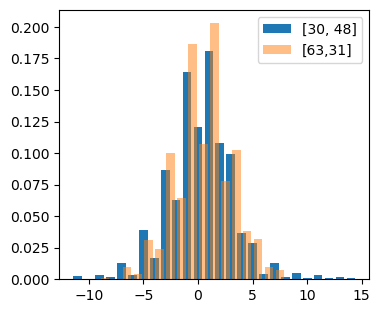

In [43]:
figure(figsize=(4,3.5))
bar(dA[:,1], dA[:,2], label="[30, 48]")
bar(dB[:,1].+0.5, dB[:,2],alpha=0.5, label="[63,31]");
legend()
savefig("histogramas_8simbolos.png",dpi=90)

In [44]:
entropy(dA[:,2]),entropy(dB[:,2])

(2.4230433755115, 2.3084735873709525)

In [45]:
entropiass1=zeros(64,64)
entropiass2=zeros(64,64)
ncountmap=zeros(64,64)
for j=1:64, k=1:64
    dict=countmap(s2[j,k,:])
    valores=values(dict)
    pesos=valores./sum(valores)
    entropiass2[j,k]=entropy(pesos)
    
    dict=countmap(symblfp[j,k,:])
    valores=values(dict)
    pesos=valores./sum(valores)
    entropiass1[j,k]=entropy(pesos)
    
    
    ncountmap[j,k]=length(valores)
end

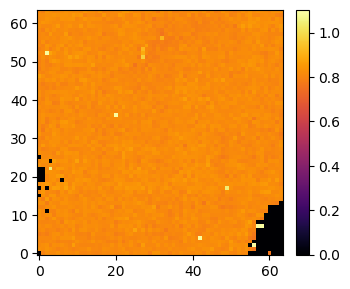

In [46]:
figure(figsize=(3.5,3.5))
imshow(entropiass1, origin="lower", vmin=0.0, vmax=1.1, cmap="inferno")
colorbar(fraction=0.045, aspect=20)
savefig("entropia2s01.png",dpi=92)

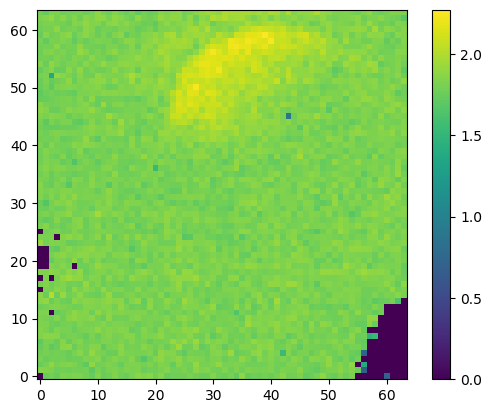

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc676b865d0>

In [47]:
imshow(entropiass2, origin="lower")
colorbar()

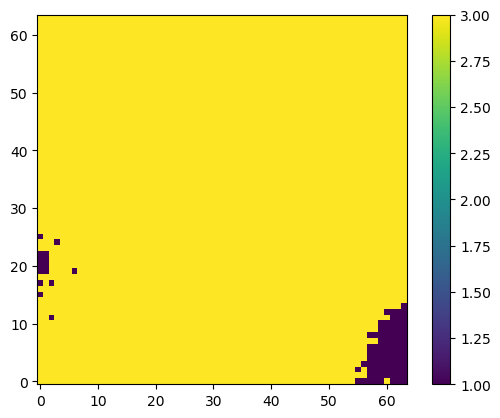

PyObject <matplotlib.colorbar.Colorbar object at 0x7fc683064dd0>

In [48]:
imshow(ncountmap, origin="lower")
colorbar()

In [49]:
aver=lfp[:,:,400];

In [50]:
function arraytocartesian(xxs::Array)
    ll=size(xxs,1)
    result=CartesianIndex[]
    for l=1:ll
        aux=CartesianIndex(xxs[l,1], xxs[l,2])
        push!(result, aux)
    end
    return result
end

function symbsum(datos::Array, n=3)
    jj,kk,nnn=size(datos)
    result=zeros(jj,kk,nnn-n)
    for j=1:64, k=1:64, l=1:(nnn-n-1)
    result[j,k,l]=sum(symblfp[j,k,l:l+n])
    end
    return result
end

symbsum (generic function with 2 methods)

In [51]:
function entrocountmap(datos)
    result=zeros(64,64)
    for j=1:64, k=1:64
        dd=dictarrayordenado(countmap(datos[j,k,:]))
        freqs=dd[:,2]./sum(dd[:,2])
        result[j,k]=entropy(freqs)
    end
    return result
end

entrocountmap (generic function with 1 method)

In [52]:
variasentropias=Dict{Int, Array}()
for m=1:18
    variasentropias[m]=entrocountmap(symbsum(symblfp,m))
end

In [53]:
function spreadentro(entropias::Array, malos::Array)
    nmalos=size(malos,1)
    auxito=deepcopy(entropias)
    for j in 1:nmalos
        r=malos[j,1]
        c=malos[j,2]
        auxito[r,c]=NaN
    end
    aux=reshape(auxito,4096)
    filter!(!isnan, aux)
    result=extrema(aux)
end

spreadentro (generic function with 1 method)

In [54]:
spreaaa=[]
susu=[]
for j=1:18
    ssp=spreadentro(variasentropias[j],malos)
    push!(susu, ssp)
    pup=ssp[2]-ssp[1]
    push!(spreaaa,pup)
    println(j, " ", ssp, " ", pup)
end

bubu=maximum(spreaaa)

1 (0.9983441653490256, 1.2242033544582638) 0.2258591891092382
2 (1.1724831722282318, 1.5313939083345196) 0.35891073610628776
3 (1.2978283019034513, 1.7285115693129993) 0.430683267409548
4 (1.4020373845117764, 1.89696259897058) 0.49492521445880366
5 (1.4762416711100466, 2.0465493266120696) 0.570307655502023
6 (1.5606186335885488, 2.172749654290649) 0.6121310207021
7 (1.6265611164448068, 2.2719250614670887) 0.6453639450222819
8 (1.6942300434215845, 2.3559867272973753) 0.6617566838757909
9 (1.7631119945082965, 2.422215435220809) 0.6591034407125127
10 (1.8202980266451814, 2.4783052448361595) 0.6580072181909782
11 (1.8806485235051078, 2.5192372286840103) 0.6385887051789025
12 (1.9212224524470787, 2.561507142545997) 0.6402846900989183
13 (1.9558289063764223, 2.604504005126109) 0.6486750987496865
14 (1.9940638620484283, 2.633412574414239) 0.6393487123658108
15 (2.023596950918733, 2.649475944914005) 0.625878993995272
16 (2.0514209406117327, 2.6599572739740727) 0.6085363333623399
17 (2.07974565

0.6617566838757909

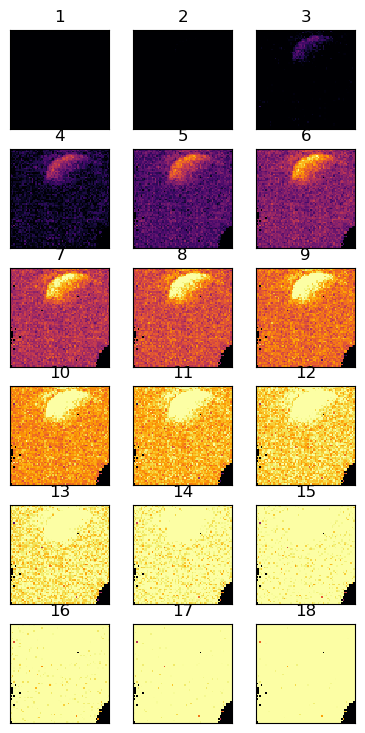

In [55]:
fig, subs=subplots(6,3, figsize=(4.5,9))

for j=1:18
    (rr, cc)=divrem(j-1,3).+1
    v1,v2=susu[j]
    subs[rr,cc].imshow(variasentropias[j], origin="lower", cmap="inferno", vmin=1.5,vmax=2.17)
    subs[rr,cc].set_title("$j")
    subs[rr,cc].tick_params(axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom=false,      # ticks along the bottom edge are off
    top=false,         # ticks along the top edge are off
    labelbottom=false,
        left=false,
        labelleft=false
    )
end

savefig("comparasumaentropias01.png",dpi=90)


In [56]:
spreadentro(variasentropias[3],malos)

(1.2978283019034513, 1.7285115693129993)

In [57]:
yxref=[39,40]
# okey menso a barreconjunto le tienes que pasar solo las columnas con coordenadas!!!
orderchans=barreconjuntoyordena(canales[:,1:2], yxref);

alfamin = 0.015623728620476831


In [58]:
""" convierte un array en un array por ventanas del array original """
function ventanear(xxs::Array, n::Int)
    result=Array[]
    ll=size(xxs,1)
    for l=1:(ll-n)
        aux=xxs[l:(l+n-1)]
        push!(result,aux)
    end
    return result
end

ventanear

In [59]:
""" entropia de n simbolos como palabra """
function entrosymventana(xxs::Array, n::Int)
    cuentas=collect(values(countmap(ventanear(xxs,n))))
    cuentas=cuentas./sum(cuentas)
    result=entropy(cuentas)
end

function blockentropy(xxs::Array, n::Int)
    result=entrosymventana(xxs, n+1)-entrosymventana(xxs, n)
end

blockentropy (generic function with 1 method)

In [60]:
entrosymventana(slfpA,3)

4.77030416045181

In [63]:
3^7

2187

In [64]:
blockentros=zeros(64,64,6)
vinentros=zeros(64,64,6)

for j=1:64,k=1:64
    for n=1:6
        vinentros[j,k,n]=entrosymventana(symblfp[j,k,:],n)
        blockentros[j,k,n]=blockentropy(symblfp[j,k,:],n)
    end
end


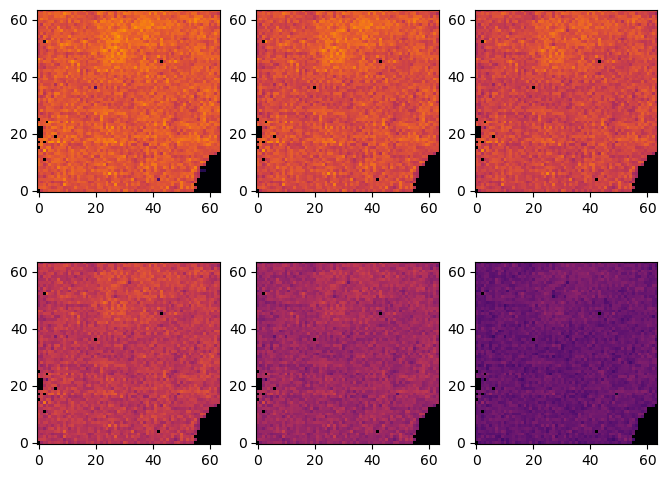

In [65]:
fig, subs=subplots(2,3, figsize=(8,6))
for j=1:6
    (rr, cc)=divrem(j-1,3).+1
    subs[rr,cc].imshow(blockentros[:,:,j], origin="lower", cmap="inferno", vmin=0.55,vmax=0.9)
end

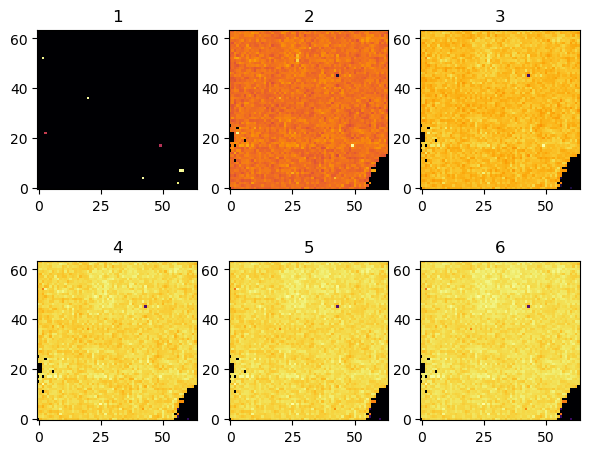

In [66]:
fig, subs=subplots(2,3, figsize=(7,5.5))
for j=1:6
    (rr, cc)=divrem(j-1,3).+1
    vmin,vmax=extrema(vinentros[:,:,j])
    subs[rr,cc].imshow(vinentros[:,:,j], origin="lower", cmap="inferno", vmin=1, vmax=vmax)
    subs[rr,cc].set_title("$j")
end

savefig("comparaentrobloc01.png",dpi=92)

In [67]:
symbA=symblfp[chanA[1], chanA[2],:]
symbB=symblfp[chanB[1], chanB[2],:];
symbruido=symblfp[20,25,:];

In [68]:
ddrA=countmap(ventanear(symbA,6))
llavesA=sort(collect(keys(ddrA)));

In [69]:
ddruido=countmap(ventanear(symbruido,6))
llavesruido=sort(collect(keys(ddruido)));

In [70]:
ttt=size(llavesA,1)
valoresorder=zeros(ttt)
for k in 1:ttt
    valoresorder[k]=ddrA[llavesA[k]]
end
ttr=size(llavesruido,1)
valorruido=zeros(ttr)

for k in 1:ttr
    valorruido[k]=ddruido[llavesruido[k]]
end
    

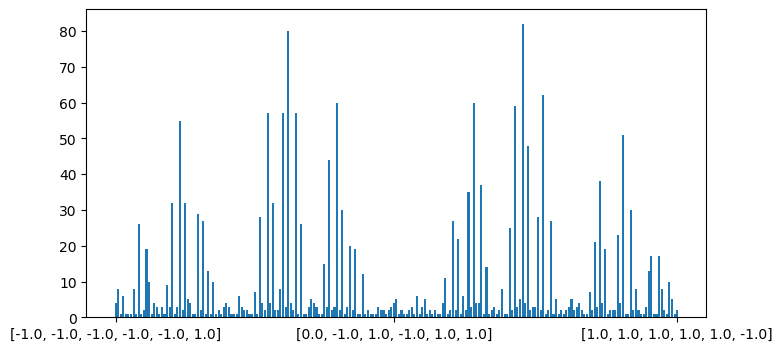

In [71]:
figure(figsize=(8,4))
bar(1:ttr, valorruido);
l2=floor(Int, ttr/2)
xtloc, xbas=xticks()
arre=[1,l2,ttr]
tu=  string.([llavesruido[1], llavesruido[l2], llavesruido[ttr]] )
xticks(arre, labels=tu);

savefig("histo6simbruido.png")

In [72]:
vv=sort(valoresorder, rev=true);

In [73]:
l2

109

In [75]:
ttr, ttt

(219, 230)

In [76]:
2000/6

333.3333333333333